# Business Decison Research

## Problem Understanding
    1. In-store business decisions are crucial for knowing store sales.
    2. Many factors influence sales results and potential left customers (churn).
    3. This analysis aims to determine potential churned customers.

## Data Understanding
    The data is taken from the DQLab class project, data related with transaction on the sport market from 2013 to 2019. The data consists of:
    1. No
    2. Row_Num
    3. Customer_ID
    4. Product
    5. First_Transaction
    6. Last_Transaction
    7. Average_Transaction_Amount
    8. Count_Transaction

## Data Preparation
### Import Data and Inspection 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('Data/data_retail.csv')
df = df.drop(columns='Unnamed: 0')

In [3]:
df.head()

,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,1,1,29531,Jaket,1466304274396,1538718482608,1467681,22
1,2,2,29531,Sepatu,1406077331494,1545735761270,1269337,41
2,3,3,141526,Tas,1493349147000,1548322802000,310915,30
3,4,4,141526,Jaket,1493362372547,1547643603911,722632,27
4,5,5,37545,Sepatu,1429178498531,1542891221530,1775036,25


information from the data:

In [4]:
print('Info dataset:')
print(df.info())

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   no                          100000 non-null  int64 
 1   Row_Num                     100000 non-null  int64 
 2   Customer_ID                 100000 non-null  int64 
 3   Product                     100000 non-null  object
 4   First_Transaction           100000 non-null  int64 
 5   Last_Transaction            100000 non-null  int64 
 6   Average_Transaction_Amount  100000 non-null  int64 
 7   Count_Transaction           100000 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 5.7+ MB
None


### Data Cleansing

Change columns transaction to datetime data type

In [5]:
# First_Transaction column
df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')
# Last_Transaction column
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')

In [6]:
print('Info dataset:')
print(df.info())

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   no                          100000 non-null  int64         
 1   Row_Num                     100000 non-null  int64         
 2   Customer_ID                 100000 non-null  int64         
 3   Product                     100000 non-null  object        
 4   First_Transaction           100000 non-null  datetime64[ns]
 5   Last_Transaction            100000 non-null  datetime64[ns]
 6   Average_Transaction_Amount  100000 non-null  int64         
 7   Count_Transaction           100000 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(1)
memory usage: 5.7+ MB
None


Churn customer:
    check the most recent transactions when done

In [7]:
print(df['Last_Transaction'].max())

2019-02-01 23:57:57.286000013


Classify churn customer based on Last_Transaction. If the customers making has stopped transacting in the last 6 month, then churn.

In [8]:
df.loc[df['Last_Transaction'] <= '2018-08-01', 'Churn'] = 'Yes'
df.loc[df['Last_Transaction'] > '2018-08-01', 'Churn'] = 'No'

Delete unused columns

In [9]:
df = df.drop(columns=['no', 'Row_Num'])

In [10]:
df.head()

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,Churn
0,29531,Jaket,2016-06-19 02:44:34.395999908,2018-10-05 05:48:02.608000040,1467681,22,No
1,29531,Sepatu,2014-07-23 01:02:11.493999958,2018-12-25 11:02:41.269999981,1269337,41,No
2,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,No
3,141526,Jaket,2017-04-28 06:52:52.546999931,2019-01-16 13:00:03.911000013,722632,27,No
4,37545,Sepatu,2015-04-16 10:01:38.530999899,2018-11-22 12:53:41.529999970,1775036,25,No


## Data Visualization
### Customer acquisition by year

Make new column for year First_Transaction and Last_Transaction

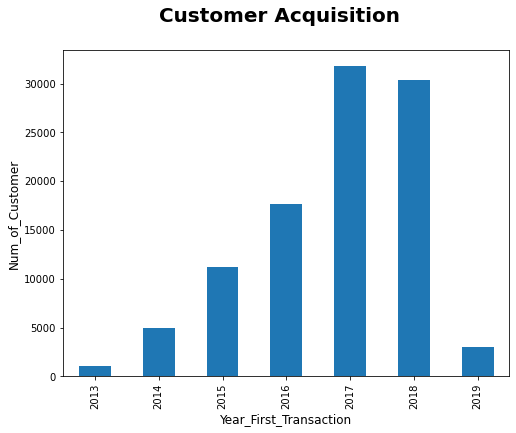

In [11]:
df['Year_First_Transaction'] = df['First_Transaction'].dt.year
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year

df_year = df.groupby(['Year_First_Transaction'])['Customer_ID'].count()

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
fig.suptitle("Customer Acquisition",fontsize=20, fontweight='bold')
df_year.plot(kind='bar', color="tab:blue")
ax.set_xlabel('Year_First_Transaction', fontsize=12)
ax.set_ylabel('Num_of_Customer', fontsize=12)
plt.show()

From this visualization, it can be seen that there is an increase in customers from 2013 until 2018, but from 2017 to 2018 slightly decreased. 

### Transaction by year

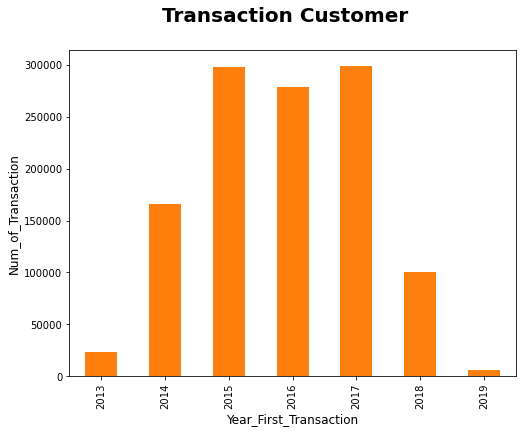

In [12]:
df_year = df.groupby(['Year_First_Transaction'])['Count_Transaction'].sum()

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
fig.suptitle('Transaction Customer',fontsize=20, fontweight='bold')
df_year.plot(kind='bar', color="tab:orange")
ax.set_xlabel('Year_First_Transaction', fontsize=12)
ax.set_ylabel('Num_of_Transaction', fontsize=12)
plt.show()

From this visualization, it can be seen that there is an increase in transactions from 2013 until 2015, then flat from 2015 to 2017, and a decrease to 2018.

### Average transaction amount by year

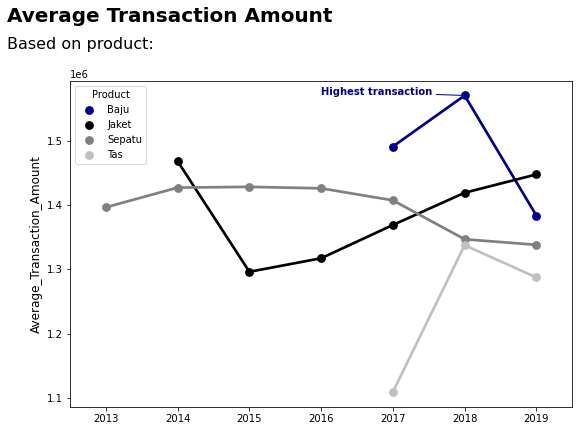

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(9, 6))
fig.suptitle("Average Transaction Amount", x=0.028, y=1.05, fontsize=20, fontweight='bold', ha="left")
ax.set_title("Based on product:\n", x=-0.125, y=1.025, fontsize=16, ha='left')

colors = ["darkblue", "black", "gray",  "silver"]
line_widths = [3, 2.5, 1.5, 1]
lp = sns.pointplot(data = df.groupby(['Product', 'Year_First_Transaction']).mean().reset_index(),
                   x='Year_First_Transaction', y='Average_Transaction_Amount', hue='Product', palette=colors)
highest_trans = df.groupby(['Product', 'Year_First_Transaction'])['Average_Transaction_Amount'].mean().max()

ax.annotate("Highest transaction", xy=(5, highest_trans), xytext=(3, highest_trans+1.5),
            ha="left", color=colors[0],fontweight='bold', arrowprops={"arrowstyle": "-", "color": colors[0]})
ax.set_xlabel("")
ax.set_ylabel("Average_Transaction_Amount", fontsize=12)
plt.show()

From this visualization, it can be seen that product baju have a the highest transaction on 2018

### Proportion Churn by Product

In [14]:
df_piv = df.pivot_table(index='Churn', 
                        columns='Product',
                        values='Customer_ID', 
                        aggfunc='count', 
                        fill_value=0)
plot_product = df_piv.count().sort_values(ascending=False).head(5).index
df_piv = df_piv.reindex(columns=plot_product)

#### Pie Chart

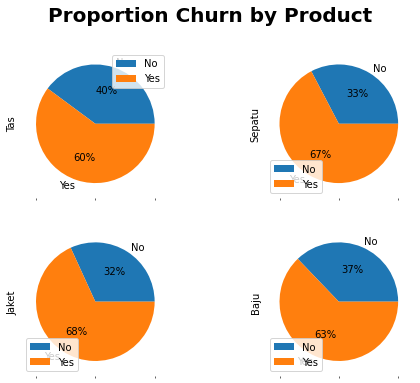

In [15]:
df_piv.plot(subplots=True, kind='pie', figsize=(8, 6), layout=(-1, 2), autopct='%1.0f%%')
plt.suptitle('Proportion Churn by Product', fontsize=20, fontweight='bold')
plt.show()

#### Bar Chart

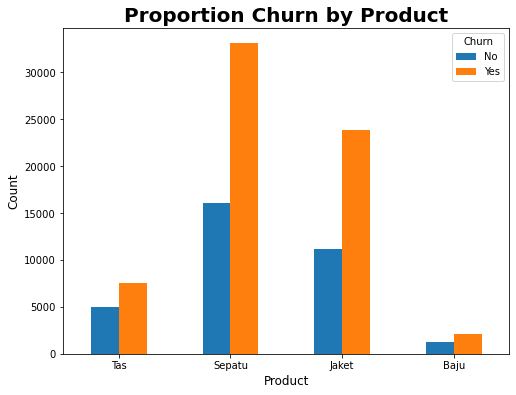

In [16]:
df_piv.T.plot(kind='bar', figsize=(8, 6))
plt.title('Proportion Churn by Product', fontsize=20, fontweight='bold')
plt.xlabel('Product', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.show()

From this visualization, it can be seen that most of customers churn in each product more higher than not churn

### Distribution of  count transaction categorization

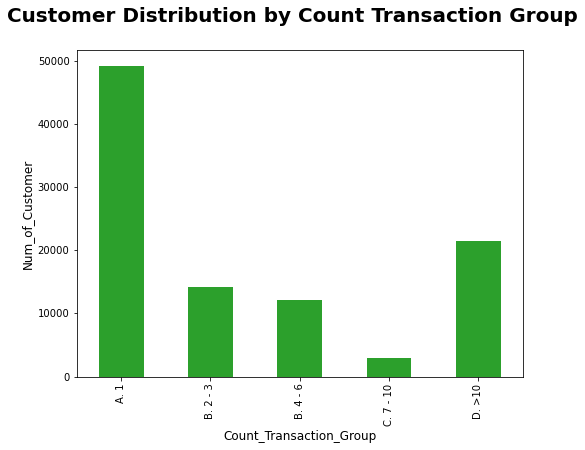

In [17]:
# Categories count of transaction
def func(row):
    if row['Count_Transaction'] == 1:
        val = 'A. 1'
    elif (row['Count_Transaction'] >1 and row['Count_Transaction'] <= 3):
        val ='B. 2 - 3'
    elif (row['Count_Transaction'] >3 and row['Count_Transaction'] <= 6):
        val ='B. 4 - 6'
    elif (row['Count_Transaction'] >6 and row['Count_Transaction'] <= 10):
        val ='C. 7 - 10'
    else:
        val ='D. >10'
    return val

# Add new column
df['Count_Transaction_Group'] = df.apply(func, axis=1)

df_year = df.groupby(['Count_Transaction_Group'])['Customer_ID'].count()

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
fig.suptitle('Customer Distribution by Count Transaction Group',fontsize=20, fontweight='bold')
df_year.plot(kind='bar', color="tab:green")
plt.xlabel('Count_Transaction_Group', fontsize=12)
plt.ylabel('Num_of_Customer', fontsize=12)
plt.show()

From this visualization, it can be seen that the customers more buy with a quantity of 1 item

### Distribution of average transaction amount categorization

<Figure size 432x288 with 0 Axes>

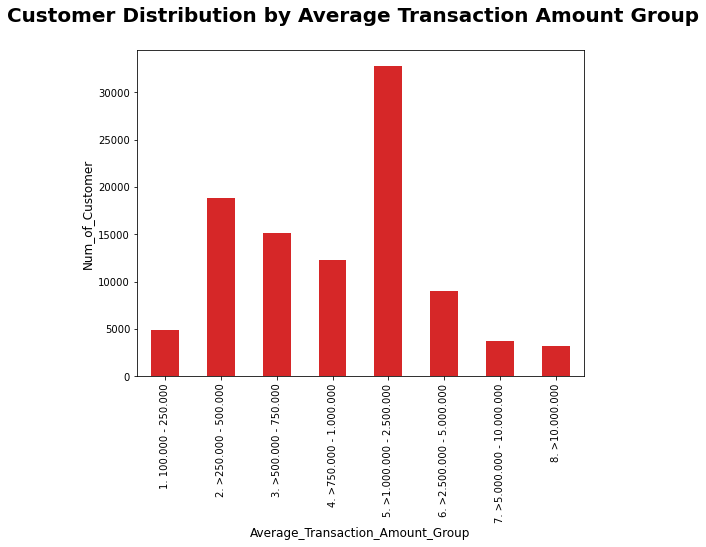

In [18]:
plt.clf()
# Categories average transaction amount
def f(row):
    if (row['Average_Transaction_Amount'] >= 100000 and row['Average_Transaction_Amount'] <=200000):
        val ='1. 100.000 - 250.000'
    elif (row['Average_Transaction_Amount'] >250000 and row['Average_Transaction_Amount'] <= 500000):
        val ='2. >250.000 - 500.000'
    elif (row['Average_Transaction_Amount'] >500000 and row['Average_Transaction_Amount'] <= 750000):
        val ='3. >500.000 - 750.000'
    elif (row['Average_Transaction_Amount'] >750000 and row['Average_Transaction_Amount'] <= 1000000):
        val ='4. >750.000 - 1.000.000'
    elif (row['Average_Transaction_Amount'] >1000000 and row['Average_Transaction_Amount'] <= 2500000):
        val ='5. >1.000.000 - 2.500.000'
    elif (row['Average_Transaction_Amount'] >2500000 and row['Average_Transaction_Amount'] <= 5000000):
        val ='6. >2.500.000 - 5.000.000'
    elif (row['Average_Transaction_Amount'] >5000000 and row['Average_Transaction_Amount'] <= 10000000):
        val ='7. >5.000.000 - 10.000.000'
    else:
        val ='8. >10.000.000'
    return val

# Add new column
df['Average_Transaction_Amount_Group'] = df.apply(f, axis=1)

df_year = df.groupby(['Average_Transaction_Amount_Group'])['Customer_ID'].count()

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
fig.suptitle('Customer Distribution by Average Transaction Amount Group',fontsize=20, fontweight='bold')
df_year.plot(kind='bar', color="tab:red")
plt.xlabel('Average_Transaction_Amount_Group', fontsize=12)
plt.ylabel('Num_of_Customer', fontsize=12)
plt.show()

From this visualization, it can be seen that the customers transaction varies widely but mostly in grup 5

## Modelling
### Feature Columns and Target

In [19]:
# Feature column: Year_Diff
df['Year_Diff'] = df['Year_Last_Transaction'] - df['Year_First_Transaction']

# Names of feature columns
feature_columns = ['Average_Transaction_Amount', 'Count_Transaction', 'Year_Diff']

# Features variable
X = df[feature_columns] 

# Target variable
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
y = df['Churn']

Split data train and test data 75:25

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

### Logistic Regression Model

Importing LogisticRegression, fit it to the train data, and predict for the test dataset

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Initiate logreg model
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train, y_train)

# Predict model
y_pred = logreg.predict(X_test)

Evaluate the model using confussion matrix

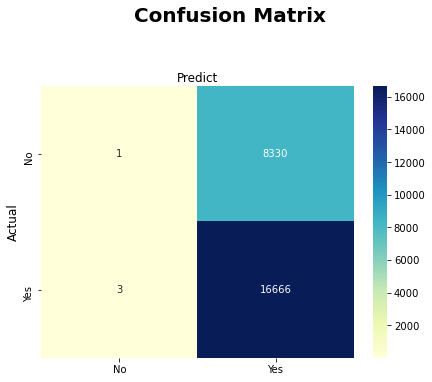

In [22]:
cnf_matrix = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(7, 5))
fig.suptitle('Confusion Matrix', y=1.1,fontsize=20, fontweight='bold')

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predict', fontsize=12)
plt.xticks([0.5,1.5], ['No', 'Yes'])
plt.yticks([0.5,1.5], ['No', 'Yes'])
plt.show()

Calculate Accuracy, Precision, dan Recall

In [23]:
from sklearn.metrics import  accuracy_score,  precision_score, recall_score

print('Accuracy :', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall :', recall_score(y_test, y_pred, average='micro'))

Accuracy : 0.66668
Precision: 0.66668
Recall : 0.66668
